<a href="https://colab.research.google.com/github/megsdata/sEMG_SupervisedLearning/blob/main/23Jul09_classical_w_MMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from google.colab import drive
drive.mount('/MSC_THESIS')

Mounted at /MSC_THESIS


In [6]:
%cd /MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS
!ls
df = pd.read_excel('09-Jul-2023_COMBINED.xlsx')
df.head(20).T

/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS
09-Jul-2023_COMBINED.xlsx
21-May-2023_COMBINED_ENC.xlsx
21-May-2023_COMBINED.xlsx
22-May-2023_DEEP_LEARNING_3subjects.xlsx
23Apr30_42samples_classical.ipynb
23Jul09_classical_w_MMG.ipynb
23Jun03_All_Enveloped_regularize.ipynb
23Jun07_All_Enveloped_relu.ipynb
23Jun10_All_Enveloped_weightwatcher.ipynb
23Jun20_All_Enveloped_weightwatcher2.ipynb
23May10_42samples_classical.ipynb
23May21_46samples_classical.ipynb
23May22_46samples_ada_boost.ipynb
23May22_All_Data
23May22_All_Data_byTrialType
23May22_Basic_Neural_Networks.ipynb
23May22_Simple_Keras_Classifier.ipynb
23May23_RectusFemoris_ON.ipynb
23May24_All_Data
23May24_AllMuscles.ipynb
23May24_RectusFemoris_ONandOFF.ipynb
23May25_AllMuscles_V2.ipynb
23May26_AllMuscles_debugging.ipynb
23May26_AllMuscles_debugging_V2.ipynb
23May26_AllMuscles_fixed.ipynb
23May28_AllMuscles.ipynb
23May28_Training_Data
23May29_AllMuscles.ipynb
23May29_AllMusclesV2.ipynb
23May29_AllMusclesV3.ipynb
23May31_A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
SubjectID,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01
RandomizedGroup_1_ONFirst_2_OFFFirst_,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
SubjectDataFileNames,20220124M-01_T2ON,20220124M-01_T2ON,20220124M-01_T2ON,20220124M-01_T2ON,20220124M-01_T2ON,20220124M-01_T2ON,20220124M-01_T2ON,20220124M-01_T3ON,20220124M-01_T3ON,20220124M-01_T3ON,20220124M-01_T3ON,20220124M-01_T3ON,20220124M-01_T3ON,20220124M-01_T3ON,20220124M-01_T1OFF,20220124M-01_T1OFF,20220124M-01_T1OFF,20220124M-01_T1OFF,20220124M-01_T1OFF,20220124M-01_T1OFF
DateOfCollection_dd_mm_yy_,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022
Sex_0_Male_1_Female_,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMGz_Freq_skewness,0.707165,0.876097,0.711317,0.707333,0.709843,0.729229,0.716175,0.707335,0.707181,0.708184,0.710027,0.710291,0.829862,0.707527,0.707121,0.707209,0.731232,0.710635,0.707144,0.724689
MMGz_Freq_kurtosis,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5
MMGz_Freq_mean_psd,0.046272,0.001023,0.002071,0.007688,0.041384,0.002226,0.022484,0.008304,0.006348,0.051813,0.022675,0.006274,0.002768,0.036331,0.000031,0.009164,0.001615,0.020649,0.033626,0.010369
MMGz_Freq_median_psd,0.015607,0.00064,0.000713,0.002607,0.014083,0.000809,0.007908,0.002799,0.002144,0.017597,0.007702,0.002149,0.00155,0.012291,0.000012,0.003092,0.000605,0.007073,0.01138,0.003715


Feature Loading

Encoding of Categorical Variables

In [ ]:
df2 = df.copy()
ohe = OneHotEncoder(handle_unknown='error')
#df2['StimulatedMuscle'] = pd.DataFrame(ohe.fit_transform(df[['MuscleGroupingOrVC']]))
#ohe.categories_
#df2.head().T

,0,1,2,3,4
SubjectID,20220124M-01,20220124M-01,20220124M-01,20220124M-01,20220124M-01
RandomizedGroup_1_ONFirst_2_OFFFirst_,1,1,1,1,1
SubjectDataFileNames,20220124M-01_T1ON,20220124M-01_T1ON,20220124M-01_T1ON,20220124M-01_T1ON,20220124M-01_T1ON
DateOfCollection_dd_mm_yy_,24/01/2022,24/01/2022,24/01/2022,24/01/2022,24/01/2022
Sex_0_Male_1_Female_,1,1,1,1,1
Age_years_,23,23,23,23,23
Height_cm_,157,157,157,157,157
Weight_kg_,50.0,50.0,50.0,50.0,50.0
DominantL_R_L_,R,R,R,R,R
PreviousLowerLimbInjury_toDominantSide___0_no_1_yes_,0,0,0,0,0


In [27]:
#select the labels and features
labels = df['NPRS_0_10_']
#features = pd.concat(df.iloc[:, [4,5,6,7, 9, 11, 12]+ [list(range(26, -1))], axis=1)
#features = df.iloc[:, [4,5,6,7,9,11,12] + [-N:]]
#features = df.iloc[:, [4,5,6,7,9,11,12] + -162:]

features = pd.concat([df.iloc[:,[4,5,6,7,9,11,12]], df.iloc[:, -162:]], axis=1)
print(labels.shape)
print(features.shape)
features.head()

(308,)
(308, 169)


,Sex_0_Male_1_Female_,Age_years_,Height_cm_,Weight_kg_,PreviousLowerLimbInjury_toDominantSide___0_no_1_yes_,FibulaLength_cm_,ShankGirth_cm_,EMG_i,EMG_t_start,EMG_t_end,...,MMGz_Freq_std_error,MMGz_Freq_var,MMGz_Freq_peakfreq,MMGz_Freq_avg_power,MMGz_Freq_totalpower,MMGz_Freq_skewness,MMGz_Freq_kurtosis,MMGz_Freq_mean_psd,MMGz_Freq_median_psd,MMGz_Freq_std_error_psd
0,1,23,157,50,0,35.0,35.0,1,7.055813,9.431150,...,0.429155,0.437476,1.148265,0.146505,1.123007e+07,0.707165,1.5,0.046272,0.015607,0.031762
1,1,23,157,50,0,35.0,35.0,2,19.003856,21.653724,...,0.072165,0.013800,0.155207,0.003240,2.503572e+07,0.876097,1.5,0.001023,0.000640,0.000519
2,1,23,157,50,0,35.0,35.0,3,31.028805,33.751012,...,0.082495,0.018526,0.242643,0.006558,3.546022e+07,0.711317,1.5,0.002071,0.000713,0.001325
3,1,23,157,50,0,35.0,35.0,4,43.066894,45.766089,...,0.166494,0.074822,0.467974,0.024342,2.575589e+07,0.707333,1.5,0.007688,0.002607,0.004950
4,1,23,157,50,0,35.0,35.0,5,55.087749,57.781957,...,0.371449,0.371732,1.084848,0.131027,2.235457e+07,0.709843,1.5,0.041384,0.014083,0.026602


In [50]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
#create test set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2,random_state=23)
#create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,random_state=23) #0.8*0.25=0.2 for the validation set

In [51]:
from sklearn.linear_model import LogisticRegression
#X, y = features_scaled, labels
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#clf.predict(y)
#clf.predict_proba(X[:2, :])
clf.score(X_test, y_test)
clf.score(X_val, y_val)

0.9516129032258065

In [53]:
#decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
#tree.plot_tree(clf)

0.8548387096774194

In [54]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
# Build a Gaussian Classifier
model = GaussianNB()
# Model training
model.fit(X_train, y_train)
# Predict Output
predicted = model.predict([X_test[6]])
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.45161290322580644
F1 Score: 0.5105404640633844


In [55]:
#random forest
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 43)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=43)

In [56]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.17 degrees.


In [36]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


In [57]:
#k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, y_train)
print("train shape: " + str(X_train.shape))
print("score on test: " + str(knn.score(X_test, y_test)))
print("score on val: "+ str(knn.score(X_val, y_val)))

train shape: (184, 169)
score on test: 0.8709677419354839
score on val: 0.8548387096774194


In [58]:
#SVM AGAIN
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
print("score on test: " + str(svm.score(X_test, y_test)))
print("score on val: "+ str(svm.score(X_val, y_val)))

score on test: 0.6129032258064516
score on val: 0.6935483870967742


In [59]:
#bagging decision tree - ensemble 1
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
print("score on test: " + str(bg.score(X_test, y_test)))
print("score on val: "+ str(bg.score(X_val, y_val)))

score on test: 0.9354838709677419
score on val: 0.8870967741935484


In [60]:
#boosting decision tree - ensemble 2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)
print("score on test: " + str(adb.score(X_test, y_test)))
print("score on val: "+ str(adb.score(X_val, y_val)))

score on test: 0.8548387096774194
score on val: 0.8709677419354839


In [61]:
#random forests - ensemble 3
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
print("score on test: " + str(rf.score(X_test, y_test)))
print("score on val: "+ str(rf.score(X_val, y_val)))

score on test: 0.9032258064516129
score on val: 0.9193548387096774


In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
#graph.render("results")
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=features,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

'results.pdf'

In [62]:
from xgboost import XGBClassifier
#scaler = MinMaxScaler()
#features_scaled = scaler.fit_transform(features)
#X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2,random_state=108)
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
test_score = xgb_clf.score(X_test, y_test)
val_score = xgb_clf.score(X_val, y_val)
print("Test score: ", test_score)
print("Val score: ", val_score)

Test score:  0.9354838709677419
Val score:  0.9838709677419355


In [67]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2,random_state=12)
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
test_score = xgb_clf.score(X_test, y_test)
val_score = xgb_clf.score(X_val, y_val)
print("XGBoost Test score: ", test_score)
print("XGBoost Val score: ", val_score)

XGBoost Test score:  0.9516129032258065
XGBoost Val score:  1.0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2,random_state=34)
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
test_score = xgb_clf.score(X_test, y_test)
val_score = xgb_clf.score(X_val, y_val)
print("XGBoost Test score: ", test_score)
print("XGBoost Val score: ", val_score)

XGBoost Test score:  0.967741935483871
XGBoost Val score:  1.0


In [77]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2,random_state=43)
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
test_score = xgb_clf.score(X_test, y_test)
val_score = xgb_clf.score(X_val, y_val)
print("XGBoost Test score: ", test_score)
print("XGBoost Val score: ", val_score)

XGBoost Test score:  0.9354838709677419
XGBoost Val score:  0.9838709677419355


In [88]:
#create test set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2,random_state=56)
#create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,random_state=56) #0.8*0.25=0.2 for the validation set
xgb_clf = XGBClassifier(random_state=2)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
test_score = xgb_clf.score(X_test, y_test)
val_score = xgb_clf.score(X_val, y_val)
print("XGBoost Test score: ", test_score)
print("XGBoost Val score: ", val_score)


XGBoost Test score:  0.9193548387096774
XGBoost Val score:  0.967741935483871


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
disp.plot()
plt.show()

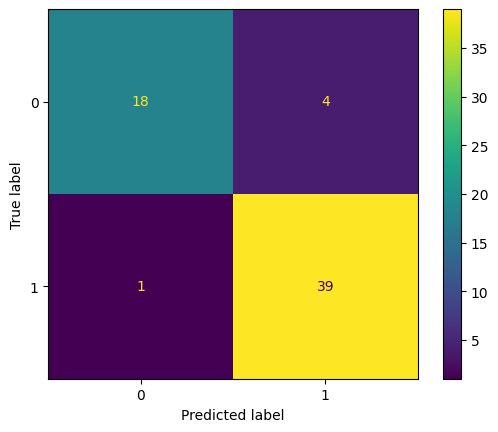

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.91      0.97      0.94        40

    accuracy                           0.92        62
   macro avg       0.93      0.90      0.91        62
weighted avg       0.92      0.92      0.92        62



In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

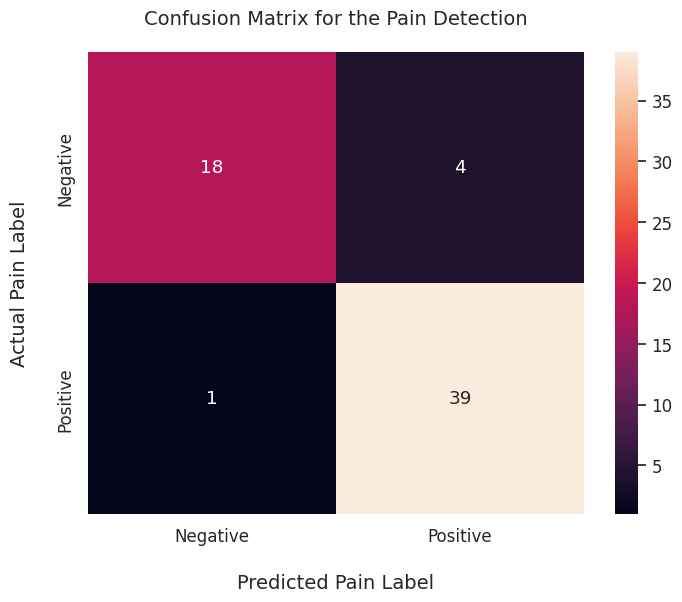

In [91]:
#use seaborn to visualize
import seaborn as sns

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Pain Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Pain Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the Pain Detection", fontsize=14, pad=20)

plt.show()

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4,
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
#clf.predict([[0, 0, 0, 0]])
print("Test score: ", clf.score(X_test, y_test))
print("Val score: ", clf.score(X_val, y_val))

Test score:  0.8709677419354839
Val score:  0.9516129032258065



autoML using TPOT Library




In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=a9d795ce2c2e39d7619f259ac295c887778519fe159af8dd31f586c372879fbc
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
# Import the tpot regressor
from tpot import TPOTRegressor

In [ ]:
# Create a tpot object with a few parameters
tpot = TPOTRegressor(scoring = 'neg_mean_absolute_error',
                    max_time_mins = 480,
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5)
# Fit the tpot model on the training data
tpot.fit(X_train, y_train)
# Show the final model
print(tpot.fitted_pipeline_)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.08170771035735369

Generation 2 - Current best internal CV score: -0.08170771035735369

Generation 3 - Current best internal CV score: -0.08008534850640114

Generation 4 - Current best internal CV score: -0.0689900426742532

Generation 5 - Current best internal CV score: -0.06344238975817923

Generation 6 - Current best internal CV score: -0.04793741109530583

Generation 7 - Current best internal CV score: -0.04793741109530583

Generation 8 - Current best internal CV score: -0.04793741109530583

Generation 9 - Current best internal CV score: -0.04793741109530583

Generation 10 - Current best internal CV score: -0.04793741109530583

Generation 11 - Current best internal CV score: -0.04793741109530583

Generation 12 - Current best internal CV score: -0.04678878675782701

Generation 13 - Current best internal CV score: -0.04678878675782701

Generation 14 - Current best internal CV score: -0.04678878675782701

Generation 15 - Current best 

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 1668, in fit
    mse_paths = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.


Generation 16 - Current best internal CV score: -0.0450303957515675

Generation 17 - Current best internal CV score: -0.0450303957515675

Generation 18 - Current best internal CV score: -0.0450303957515675

Generation 19 - Current best internal CV score: -0.042532005689900426


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib


Generation 20 - Current best internal CV score: -0.042532005689900426


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib


Generation 21 - Current best internal CV score: -0.03726884779516358


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib


Generation 22 - Current best internal CV score: -0.03726884779516358

Generation 23 - Current best internal CV score: -0.03726884779516358

Generation 24 - Current best internal CV score: -0.03726884779516358

Generation 25 - Current best internal CV score: -0.03726884779516358

Generation 26 - Current best internal CV score: -0.03726884779516358

Generation 27 - Current best internal CV score: -0.03726884779516358

Generation 28 - Current best internal CV score: -0.03726884779516358

Generation 29 - Current best internal CV score: -0.03726884779516358

Generation 30 - Current best internal CV score: -0.03726884779516358

Generation 31 - Current best internal CV score: -0.03726884779516358

Generation 32 - Current best internal CV score: -0.03726884779516358

Generation 33 - Current best internal CV score: -0.03726884779516358

Generation 34 - Current best internal CV score: -0.03726884779516358


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib


Generation 35 - Current best internal CV score: -0.03726884779516358

Generation 36 - Current best internal CV score: -0.03726884779516358

Generation 37 - Current best internal CV score: -0.03726884779516358

Generation 38 - Current best internal CV score: -0.03726884779516358

Generation 39 - Current best internal CV score: -0.03726884779516358

Generation 40 - Current best internal CV score: -0.03726884779516358

Generation 41 - Current best internal CV score: -0.03726884779516358

Generation 42 - Current best internal CV score: -0.03451921505724683


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib


Generation 43 - Current best internal CV score: -0.03451921505724683

Generation 44 - Current best internal CV score: -0.03451921505724683

Generation 45 - Current best internal CV score: -0.03451921505724683

Generation 46 - Current best internal CV score: -0.03451921505724683

Generation 47 - Current best internal CV score: -0.03451921505724683

Generation 48 - Current best internal CV score: -0.03451921505724683


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 1668, in fit
    mse_paths = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.10/


Generation 49 - Current best internal CV score: -0.03451921505724683


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib


Generation 50 - Current best internal CV score: -0.03451921505724683

Generation 51 - Current best internal CV score: -0.03451921505724683

Generation 52 - Current best internal CV score: -0.03450101864354002

Generation 53 - Current best internal CV score: -0.031863442389758176

Generation 54 - Current best internal CV score: -0.031863442389758176

Generation 55 - Current best internal CV score: -0.031863442389758176

Generation 56 - Current best internal CV score: -0.031863442389758176

Generation 57 - Current best internal CV score: -0.031863442389758176

Generation 58 - Current best internal CV score: -0.031863442389758176

Generation 59 - Current best internal CV score: -0.031863442389758176

Generation 60 - Current best internal CV score: -0.031863442389758176

Generation 61 - Current best internal CV score: -0.031863442389758176

Generation 62 - Current best internal CV score: -0.031863442389758176

Generation 63 - Current best internal CV score: -0.031863442389758176

Generati

In [ ]:
# Export the pipeline as a python script file
tpot.export('tpot_exported_pipeline.py')
# Import file management
from google.colab import file
# Download the pipeline for local use
files.download('tpot_exported_pipeline.py')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-11049a3d2826>", line 2, in <cell line: 2>
    tpot.export('tpot_exported_pipeline.py')
  File "/usr/local/lib/python3.10/dist-packages/tpot/base.py", line 1295, in export
    with open(output_file_name, "w") as output_file:
OSError: [Errno 107] Transport endpoint is not connected: 'tpot_exported_pipeline.py'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-p

In [ ]:
# Evaluate the final model
print(tpot.score(testing_features, testing_targets))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-41d70b2ec51b>", line 2, in <cell line: 2>
    print(tpot.score(testing_features, testing_targets))
NameError: name 'testing_features' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib